In [1]:
from sympy import *

t=symbols('t')


In [2]:
def inner(f,g):
    return integrate(f*g, (t,0,1))

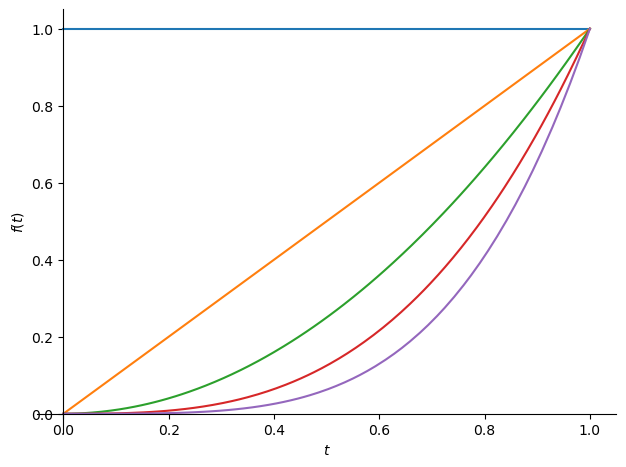

In [3]:
k=5

m= [t**j for j in range(k)]

plot(*m, (t,0,1))

In [4]:


q=m.copy()

# Gram-Schmidt
for i in range(k):
    for j in range(i):
        q[i] -= inner(q[i], q[j])*q[j] #subtract projection onto q[j]
    q[i] = q[i]/sqrt(inner(q[i], q[i])) # normalize
for f in q:
    display(f)

1

2*sqrt(3)*(t - 1/2)

6*sqrt(5)*(t**2 - t + 1/6)

20*sqrt(7)*(t**3 - 3*t**2/2 + 3*t/5 - 1/20)

210*t**4 - 420*t**3 + 270*t**2 - 60*t + 3

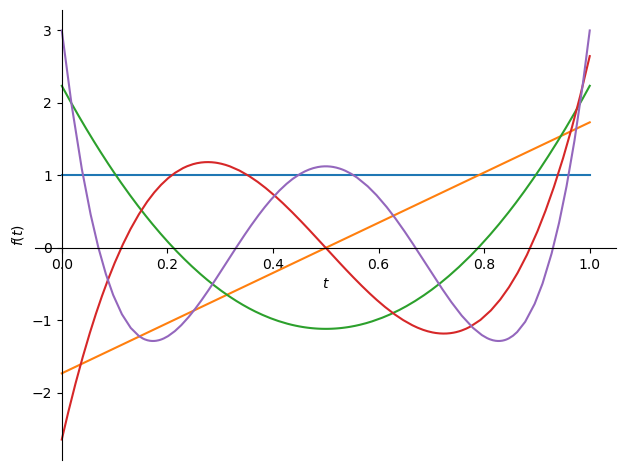

In [5]:
plot(*q, (t,0,1)) # plot of the orthonormal basis

In [6]:
M = Matrix([[inner(f,g) for f in m] for g in m])
display(M)

Matrix([
[  1, 1/2, 1/3, 1/4, 1/5],
[1/2, 1/3, 1/4, 1/5, 1/6],
[1/3, 1/4, 1/5, 1/6, 1/7],
[1/4, 1/5, 1/6, 1/7, 1/8],
[1/5, 1/6, 1/7, 1/8, 1/9]])

In [7]:
# check orthonormality
Q = Matrix([[inner(f,g) for f in q] for g in q])
display(Q)

Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1]])

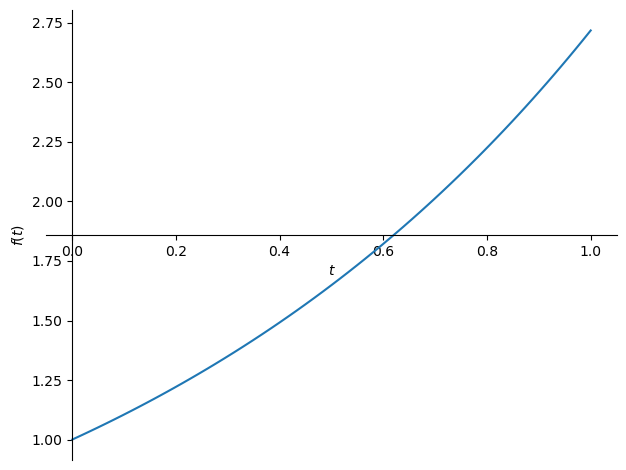

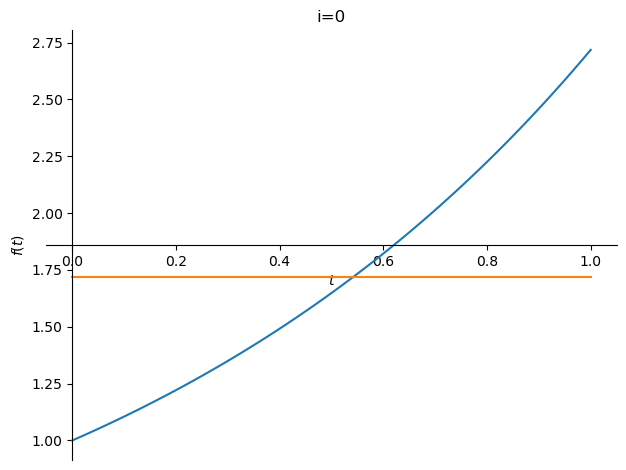

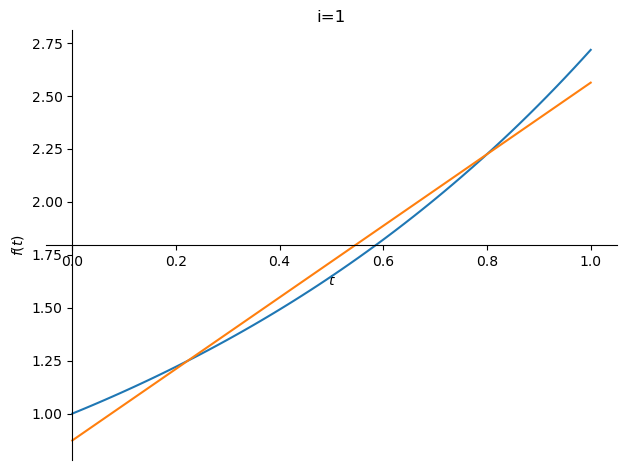

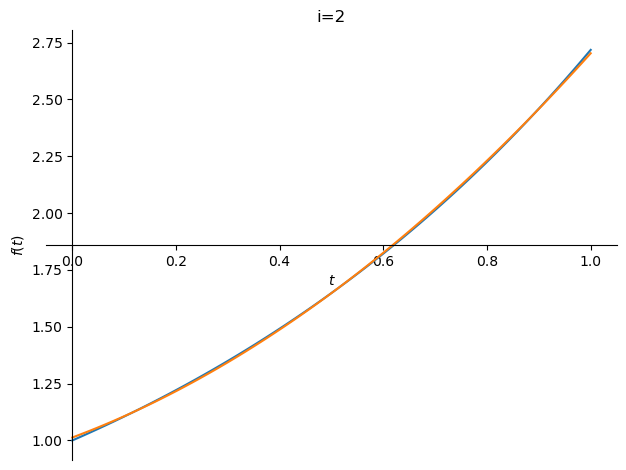

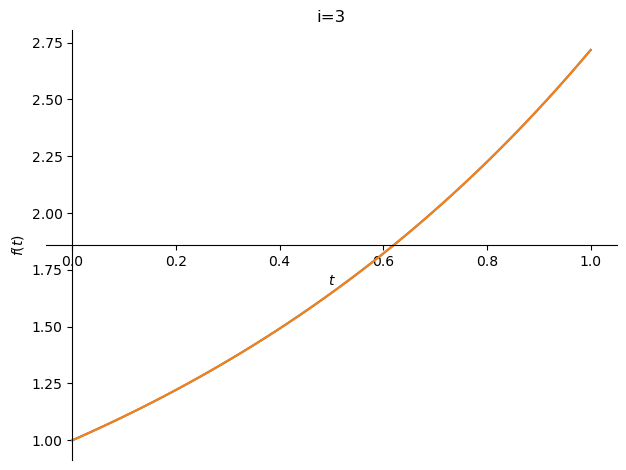

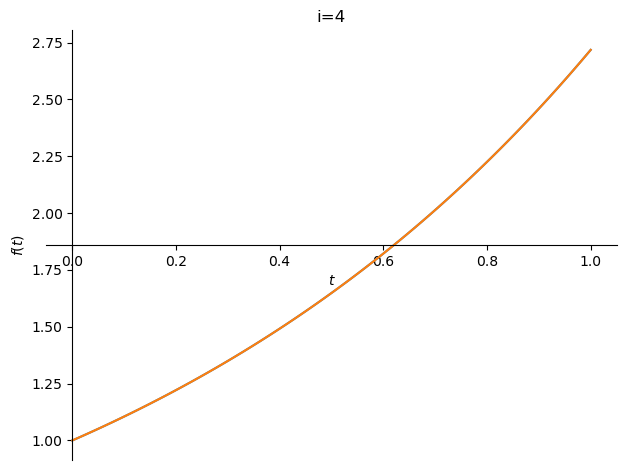

Matrix([
[                     -1 + E],
[     -sqrt(3)*E + 3*sqrt(3)],
[  -19*sqrt(5) + 7*sqrt(5)*E],
[-71*sqrt(7)*E + 193*sqrt(7)],
[             -8163 + 3003*E]])

In [8]:
# projection of e^t onto the orthonormal basis
f=exp(t)
proj=0
plot(f, (t,0,1))
r=zeros(k,1)
for i in range(k):
    r[i]=inner(f,q[i])
    proj += r[i]*q[i]
    plot(f,proj, (t,0,1), title="i="+str(i))
 

display(r)

In [9]:
display(proj.simplify())

-1714230*t**4 + 630630*E*t**4 - 1271200*E*t**3 + 3455480*t**3 - 2245110*t**2 + 825930*E*t**2 - 186360*E*t + 506580*t - 25945 + 9545*E

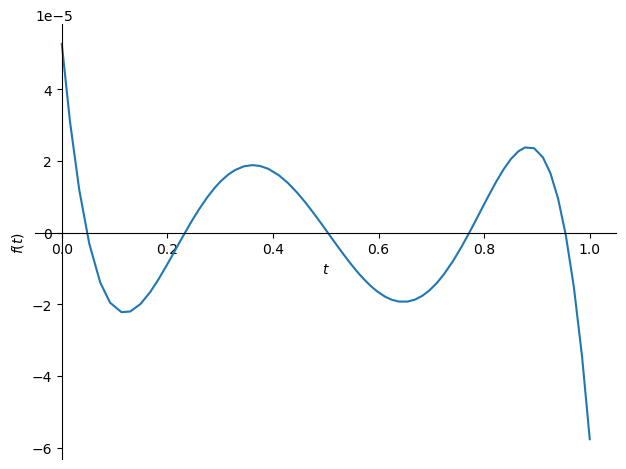

In [10]:
plot(proj-f, (t,0,1))